In [3]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [4]:
tf.__version__

'2.7.0'

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('forest_fire/Training and Validation',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 1832 images belonging to 2 classes.


In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('forest_fire/Testing',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 68 images belonging to 2 classes.


In [7]:
cnn = tf.keras.models.Sequential()

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [9]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [11]:
cnn.add(tf.keras.layers.Flatten())

In [12]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [13]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [14]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [16]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
58/58 [==============================] - 8s 140ms/step - loss: 0.0405 - accuracy: 0.9853 - val_loss: 0.2481 - val_accuracy: 0.9118
Epoch 2/25
58/58 [==============================] - 8s 139ms/step - loss: 0.0483 - accuracy: 0.9847 - val_loss: 0.0756 - val_accuracy: 0.9706
Epoch 3/25
58/58 [==============================] - 9s 153ms/step - loss: 0.0503 - accuracy: 0.9798 - val_loss: 0.1549 - val_accuracy: 0.9412
Epoch 4/25
58/58 [==============================] - 9s 156ms/step - loss: 0.0335 - accuracy: 0.9880 - val_loss: 0.2249 - val_accuracy: 0.9118
Epoch 5/25
58/58 [==============================] - 9s 152ms/step - loss: 0.0451 - accuracy: 0.9825 - val_loss: 0.1198 - val_accuracy: 0.9412
Epoch 6/25
58/58 [==============================] - ETA: 0s - loss: 0.0487 - accuracy: 0.98 - 10s 171ms/step - loss: 0.0487 - accuracy: 0.9820 - val_loss: 0.1351 - val_accuracy: 0.9412
Epoch 7/25
58/58 [==============================] - 9s 153ms/step - loss: 0.0297 - accuracy: 0.9874 - val

In [44]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('forest_fire/single_prediction/fire_or_not_2.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'no_fire'
else:
  prediction = 'fire'

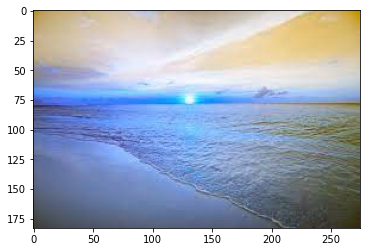

In [47]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
im = cv2.imread('forest_fire/single_prediction/fire_or_not_2.jpg',cv2.IMREAD_UNCHANGED)  #cv2.IMREAD_COLOR  or 1
plt.imshow(im)
plt.show()

In [43]:
print(prediction)

fire


In [17]:
!pip install opencv-python